## Dataset
https://www.kaggle.com/datasets/blessondensil294/christopher-nolan-filmography-and-scripts/

In [6]:
import os

def combine_scripts(output_file):
    # Get the current working directory
    cwd = os.getcwd()

    # Set the input directory path to cwd/data
    input_directory = os.path.join(cwd, "data")

    # Initialize an empty string to store the combined text
    combined_text = ""

    # Iterate over files in the input directory
    for filename in os.listdir(input_directory):
        if filename.endswith(".txt"):  # Check if the file has a .txt extension
            file_path = os.path.join(input_directory, filename)
            try:
                with open(file_path, "r", encoding="utf-8") as file:
                    file_content = file.read()
                    combined_text += file_content + "\n"  # Add the file content to the combined text
            except Exception as e:
                print(f"Error reading {filename}: {str(e)}")

    # Write the combined text to the output file
    with open(os.path.join(cwd, "data", output_file), "w", encoding="utf-8") as output:
        output.write(combined_text)

combine_scripts("combined.txt")

In [7]:
combined_txt_path = "data/combined.txt"
with open(combined_txt_path, "r", encoding="utf-8") as file:
    combined_txt = file.read()

## Exploring the text

In [8]:
print("Size of dataset in characters: ", len(combined_txt))

Size of dataset in characters:  12656655


In [9]:
# First 1000 chars
print(combined_txt[:1000])

After the opening logos, leaves start falling and we hear a voice-over.

BRUCE WAYNE (VO): There was a time above... A time before...

The camera pans up, two coffins are being carried to a crypt.

BRUCE WAYNE (VO): There were perfect things. Diamond absolutes. But things fall... Things on Earth...

Cut to another angle, a mansion is seen in the distance, and three people are ahead of the coffins: an elderly man, a British guy with a hat (ALFRED PENNYWORTH) and a boy....

BRUCE WAYNE (VO): And what falls is fallen.

...who just before entering the crypt starts running.

ALFRED: Master Wayne. Bruce! Bruce, it's alright. Bruce, please.

As young Bruce Wayne passes by tombstones, he enters a nearby forest. Cut to black.

OPENING CREDITS

Scenes of Bruce Wayne running through the woods and eventually falling down an open trapdoor are intercut with the events that lead to the funeral, where outside a screening of Zorro, Bruce's parents THOMAS and MARTHA WAYNE are shot by a mugger.

THOMAS: 

In [10]:
# Unique chars
chars = sorted(list(set(combined_txt)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !"#$%&'()*,-./0123456789:;=?ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]`abcdefghijklmnopqrstuvwxyz~£¯Ééû–‘’“”…−
99


## Word Cloud

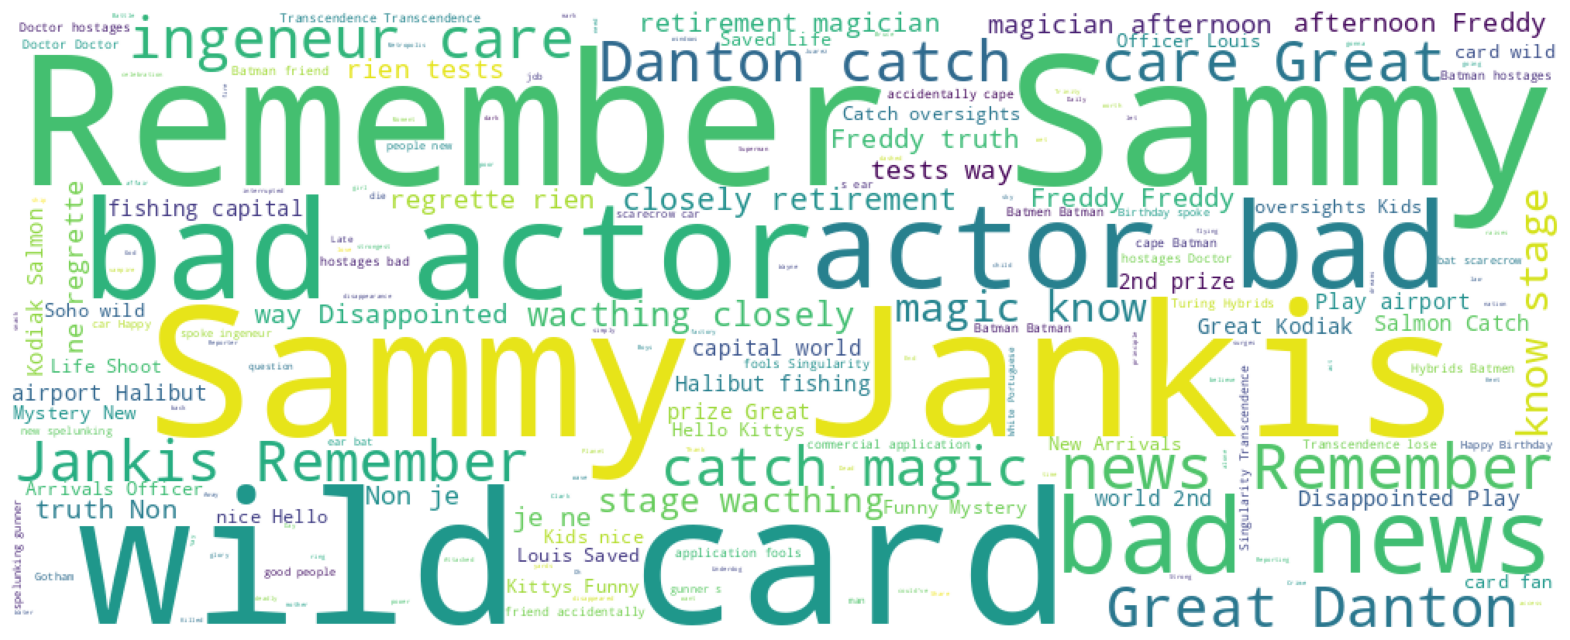

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import regex as re

# Regular expression pattern to identify dialogues (not in all caps)
dialogue_pattern = r'"(.*?)"'

# Find all non-all caps dialogues in the script
dialogues = re.findall(dialogue_pattern, combined_txt)
all_words = [word for dialogue in dialogues for word in dialogue.split() if not word.isupper()]
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in all_words if word.lower() not in stop_words and len(word) > 1]

# Generate a word cloud
wordcloud = WordCloud(width=1000, height=400, background_color="white").generate(" ".join(filtered_words))

# Display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Dialogue Length Distribution

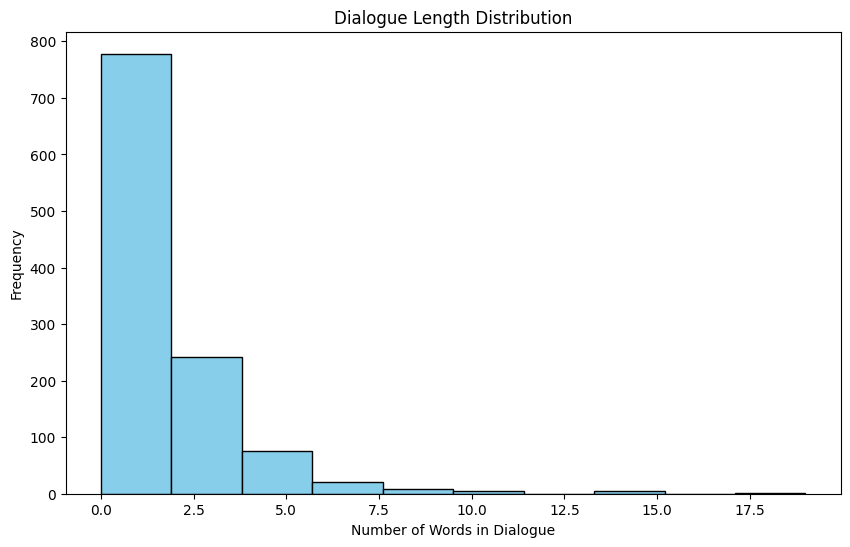

In [39]:
import re
import matplotlib.pyplot as plt

# Calculate dialogue lengths
dialogue_lengths = [len(dialogue.split()) for dialogue in dialogues]

# Create a histogram of dialogue lengths
plt.figure(figsize=(10, 6))
plt.hist(dialogue_lengths, bins=10, color='skyblue', edgecolor='black')
plt.xlabel("Number of Words in Dialogue")
plt.ylabel("Frequency")
plt.title("Dialogue Length Distribution")
plt.show()

## Bar Chart of Top N Words

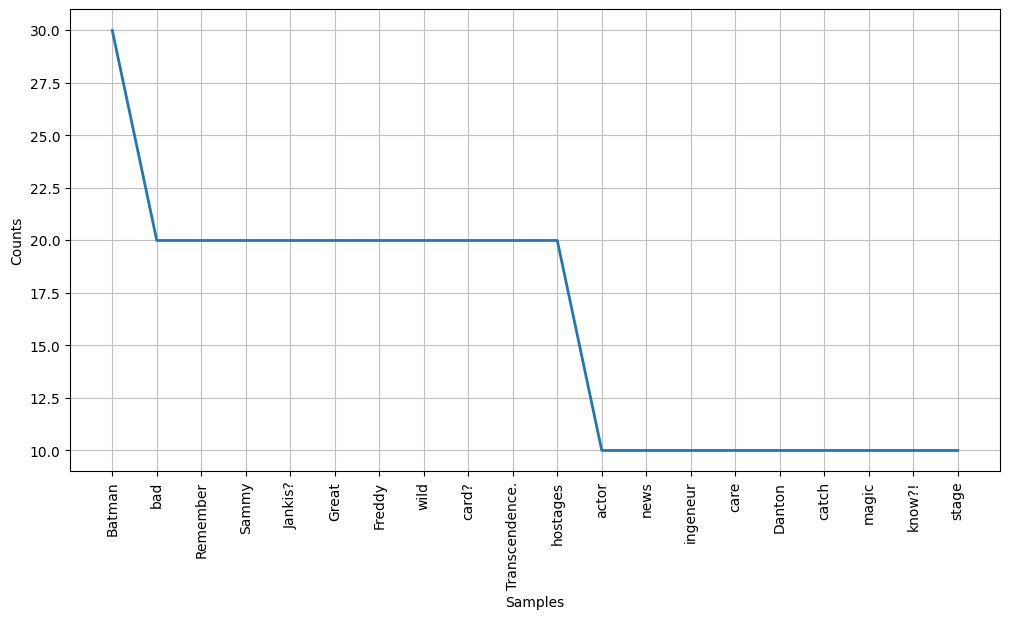

In [47]:
import nltk
import matplotlib.pyplot as plt

freq_dist = nltk.FreqDist(filtered_words)

# Get the top N most frequent words
top_words = freq_dist.most_common(20)

# Plot a bar chart of top words
plt.figure(figsize=(12, 6))
nltk.FreqDist(dict(top_words)).plot(500, cumulative=False)
plt.show()